# Skip List Data Structure - Basic Experimental Analysis

## Overview
This notebook provides a basic analysis of Skip List operations including:
- Search, Insert, and Delete operations analysis
- Theoretical vs Empirical comparison
- Basic performance visualization

**Purpose**: Skip List Algorithm Performance Study

## 1. Import Libraries and Core Data Structures

In [36]:
# Import required libraries
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt

class SkipListNode:
    """Node class for Skip List implementation"""
    def __init__(self, key, value, level):
        self.key = key
        self.value = value
        self.forward = [None] * (level + 1)  # Array of forward pointers

class SkipList:
    """Skip List data structure with operation counting"""
    def __init__(self, max_level=16, p=0.5):
        self.max_level = max_level
        self.p = p
        self.header = SkipListNode(-1, None, max_level)
        self.current_level = 0
        # Counters for experimental analysis
        self.search_operations = 0
        self.insert_operations = 0
        self.comparisons = 0
    
    def random_level(self):
        """Generate random level using geometric distribution"""
        level = 0
        while random.random() < self.p and level < self.max_level:
            level += 1
        return level
    
    def search(self, key, count_operations=True):
        """Search for a key and count operations"""
        if count_operations:
            self.search_operations = 0
            self.comparisons = 0
        current = self.header
        for level in range(self.current_level, -1, -1):
            while (current.forward[level] and 
                   current.forward[level].key < key):
                current = current.forward[level]
                if count_operations:
                    self.search_operations += 1
                    self.comparisons += 1
        current = current.forward[0]
        if count_operations:
            self.search_operations += 1
            self.comparisons += 1
        if current and current.key == key:
            return current.value, self.search_operations if count_operations else 0
        return None, self.search_operations if count_operations else 0
    
    def insert(self, key, value):
        """Insert a key-value pair"""
        update = [None] * (self.max_level + 1)
        current = self.header
        for level in range(self.current_level, -1, -1):
            while (current.forward[level] and 
                   current.forward[level].key < key):
                current = current.forward[level]
            update[level] = current
        current = current.forward[0]
        if current and current.key == key:
            current.value = value  # Update existing
        else:
            new_level = self.random_level()
            if new_level > self.current_level:
                for level in range(self.current_level + 1, new_level + 1):
                    update[level] = self.header
                self.current_level = new_level
            new_node = SkipListNode(key, value, new_level)
            for level in range(new_level + 1):
                new_node.forward[level] = update[level].forward[level]
                update[level].forward[level] = new_node
    
    def delete_with_count(self, key, count_operations=True):
        """Delete a key and count operations"""
        if count_operations:
            self.search_operations = 0
        
        update = [None] * (self.max_level + 1)
        current = self.header
        
        # Find the node to delete
        for level in range(self.current_level, -1, -1):
            while (current.forward[level] and 
                   current.forward[level].key < key):
                current = current.forward[level]
                if count_operations:
                    self.search_operations += 1
            update[level] = current
        
        current = current.forward[0]
        if count_operations:
            self.search_operations += 1
        
        if current and current.key == key:
            # Remove the node
            for level in range(len(current.forward)):
                if update[level].forward[level] != current:
                    break
                update[level].forward[level] = current.forward[level]
            
            # Update max level if necessary
            while (self.current_level > 0 and 
                   self.header.forward[self.current_level] is None):
                self.current_level -= 1
            
            return True, self.search_operations if count_operations else 0
        
        return False, self.search_operations if count_operations else 0
    
    def display(self):
        """Display the skip list structure"""
        print("\nSkip List Structure:")
        for level in range(self.current_level, -1, -1):
            print(f"Level {level}: ", end="")
            node = self.header.forward[level]
            while node:
                print(f"{node.key} ", end="")
                node = node.forward[level]
            print()

print("✅ Core classes and imports loaded successfully!")

✅ Core classes and imports loaded successfully!


## 2. Basic Utility Functions

In [37]:
def create_basic_plot(x_data, y_data, x_label, y_label, title, log_scale=False):
    """Create a basic plot with customization"""
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'b-o', linewidth=2, markersize=6)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    if log_scale:
        plt.xscale('log')
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

print("✅ Basic utility functions loaded successfully!")

✅ Basic utility functions loaded successfully!


## 3. Experiment Framework

In [53]:
class SkipListExperiment:
    """Main experiment class for Skip List analysis"""
    
    def __init__(self):
        self.results = []
    
    def theoretical_expected_cost(self, n, p):
        """Calculate theoretical expected search cost"""
        if p <= 0 or p >= 1:
            return float('inf')
        L_n = math.log(n) / math.log(1/p) if p != 0.5 else math.log2(n)
        return (1 - p) * L_n / p + 1/p
    
    def generate_random_data(self, n, seed=42):
        """Generate random array for testing"""
        random.seed(seed)
        return random.sample(range(1, n * 10), n)

print("✅ Simplified experiment framework loaded successfully!")

✅ Simplified experiment framework loaded successfully!


## 4. Search Operation Experiments

In [54]:
def run_single_experiment(self, n, p, num_searches=1000):
    """Run search experiment for given parameters"""
    print(f"\n=== Search Experiment: n={n}, p={p} ===")
    
    # Create skip list and insert data
    skip_list = SkipList(max_level=20, p=p)
    data = self.generate_random_data(n)
    
    print(f"Inserting {n} elements...")
    start_time = time.time()
    for i, key in enumerate(data):
        skip_list.insert(key, f"value_{key}")
    insert_time = time.time() - start_time
    print(f"Insert time: {insert_time:.4f}s")
    
    # Theoretical calculations
    theoretical_expected = self.theoretical_expected_cost(n, p)
    print(f"Theoretical E[X]: {theoretical_expected:.3f}")
    
    # Perform searches and collect statistics
    search_costs = []
    successful_searches = 0
    
    print(f"Performing {num_searches} searches...")
    
    for i in range(num_searches):
        # Mix of successful and unsuccessful searches
        if i % 2 == 0:  # Search for existing key
            search_key = random.choice(data)
        else:  # Search for non-existing key  
            search_key = random.randint(1, n * 10)
            while search_key in data:
                search_key = random.randint(1, n * 10)
        
        result, operations = skip_list.search(search_key, count_operations=True)
        search_costs.append(operations)
        
        if result is not None:
            successful_searches += 1
    
    # Basic statistical analysis
    empirical_mean = np.mean(search_costs)
    
    print(f"\n--- Results ---")
    print(f"Successful searches: {successful_searches}/{num_searches}")
    print(f"Empirical E[X]: {empirical_mean:.3f}")
    
    # Simple comparison with theory
    error_mean = abs(empirical_mean - theoretical_expected) / theoretical_expected * 100
    print(f"Mean error: {error_mean:.2f}%")
    
    return {
        'n': n,
        'p': p,
        'operation': 'search',
        'theoretical_expected': theoretical_expected,
        'empirical_mean': empirical_mean,
        'search_costs': search_costs,
        'error_mean': error_mean
    }

# Add method to class
SkipListExperiment.run_single_experiment = run_single_experiment
print("✅ Simplified search experiment loaded successfully!")

✅ Simplified search experiment loaded successfully!


In [55]:
def run_insert_experiment(self, n, p, num_operations=1000):
    """Run insert experiment for given parameters"""
    print(f"\n=== Insert Experiment: n={n}, p={p} ===")
    
    # Create skip list
    skip_list = SkipList(max_level=20, p=p)
    data = self.generate_random_data(n)
    
    # Theoretical calculations (similar to search)
    theoretical_expected = self.theoretical_expected_cost(n, p)
    
    # Perform inserts and collect statistics
    insert_costs = []
    
    print(f"Performing {num_operations} insert operations...")
    
    for i in range(min(num_operations, len(data))):
        key = data[i]
        # Count operations during insert (approximated by search cost)
        _, operations = skip_list.search(key, count_operations=True)
        skip_list.insert(key, f"value_{key}")
        insert_costs.append(operations)
    
    # Statistical analysis
    empirical_mean = np.mean(insert_costs) if insert_costs else 0
    
    print(f"Insert - Theoretical E[X]: {theoretical_expected:.3f}")
    print(f"Insert - Empirical E[X]: {empirical_mean:.3f}")
    print(f"Successful inserts: {len(insert_costs)}")
    
    # Simple comparison with theory
    error_mean = abs(empirical_mean - theoretical_expected) / theoretical_expected * 100 if theoretical_expected > 0 else 0
    print(f"Mean error: {error_mean:.2f}%")
    
    return {
        'n': n,
        'p': p,
        'operation': 'insert',
        'theoretical_expected': theoretical_expected,
        'empirical_mean': empirical_mean,
        'operation_costs': insert_costs,
        'error_mean': error_mean
    }

def run_delete_experiment(self, n, p, num_operations=1000):
    """Run delete experiment for given parameters"""
    print(f"\n=== Delete Experiment: n={n}, p={p} ===")
    
    # Create skip list and populate it
    skip_list = SkipList(max_level=20, p=p)
    data = self.generate_random_data(n)
    
    # Insert all data first
    for key in data:
        skip_list.insert(key, f"value_{key}")
    
    # Theoretical calculations for delete (similar to search)
    theoretical_expected = self.theoretical_expected_cost(n, p)
    
    # Perform deletes and collect statistics
    delete_costs = []
    
    print(f"Performing {num_operations} delete operations...")
    
    # Shuffle data for random deletion order
    import random
    delete_data = data.copy()
    random.shuffle(delete_data)
    
    for i in range(min(num_operations, len(delete_data))):
        key = delete_data[i]
        found, operations = skip_list.delete_with_count(key, count_operations=True)
        if found:
            delete_costs.append(operations)
    
    # Statistical analysis
    empirical_mean = np.mean(delete_costs) if delete_costs else 0
    
    print(f"Delete - Theoretical E[X]: {theoretical_expected:.3f}")
    print(f"Delete - Empirical E[X]: {empirical_mean:.3f}")
    print(f"Successful deletes: {len(delete_costs)}")
    
    # Simple comparison with theory
    error_mean = abs(empirical_mean - theoretical_expected) / theoretical_expected * 100 if theoretical_expected > 0 else 0
    print(f"Mean error: {error_mean:.2f}%")
    
    return {
        'n': n,
        'p': p,
        'operation': 'delete',
        'theoretical_expected': theoretical_expected,
        'empirical_mean': empirical_mean,
        'operation_costs': delete_costs,
        'error_mean': error_mean
    }

# Add methods to SkipListExperiment class
SkipListExperiment.run_insert_experiment = run_insert_experiment
SkipListExperiment.run_delete_experiment = run_delete_experiment

print("✅ Insert and Delete experiment methods loaded successfully!")
print("Note: Insert and Delete operations have similar O(log n) complexity as they use search as a subroutine.")

✅ Insert and Delete experiment methods loaded successfully!
Note: Insert and Delete operations have similar O(log n) complexity as they use search as a subroutine.


## 6. Visualization and Plotting Functions

In [56]:
def plot_basic_comparison(self, all_results, operation_type='search'):
    """Create a basic comparison plot for theoretical vs empirical results"""
    # Filter results for the specified operation
    filtered_results = [r for r in all_results if r.get('operation', 'search') == operation_type]
    
    if not filtered_results:
        print(f"No results found for {operation_type} operations")
        return
    
    # Sort by n for better plotting
    filtered_results.sort(key=lambda x: x['n'])
    
    # Extract data
    n_values = [r['n'] for r in filtered_results]
    theoretical_ops = [r['theoretical_expected'] for r in filtered_results]
    empirical_ops = [r['empirical_mean'] for r in filtered_results]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot empirical operations
    plt.plot(n_values, empirical_ops, 'r-o', label=f'Empirical {operation_type.title()} Operations', 
            linewidth=2, markersize=6)
    
    # Plot theoretical operations
    plt.plot(n_values, theoretical_ops, 'b--s', label=f'Theoretical {operation_type.title()} Operations', 
            linewidth=2, markersize=5, alpha=0.8)
    
    # Customization
    plt.xlabel('n (Number of Elements)', fontsize=12)
    plt.ylabel('Number of Operations', fontsize=12)
    plt.title(f'Skip List {operation_type.title()} Operations: Theoretical vs Empirical', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Use log scale for better visualization
    plt.xscale('log')
    plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

# Add method to SkipListExperiment class
SkipListExperiment.plot_basic_comparison = plot_basic_comparison

print("✅ Basic plotting function loaded successfully!")

✅ Basic plotting function loaded successfully!


## 7. Basic Visualization and Results

In [57]:
def display_basic_results(self, results):
    """Display basic experimental results"""
    print(f"\n{'='*50}")
    print("EXPERIMENTAL RESULTS SUMMARY")
    print(f"{'='*50}")
    
    # Display basic statistics
    operation = results.get('operation', 'search')
    n = results.get('n', 'N/A')
    p = results.get('p', 'N/A')
    
    print(f"Operation: {operation.title()}")
    print(f"Dataset size (n): {n}")
    print(f"Probability (p): {p}")
    print(f"Theoretical Expected Cost: {results.get('theoretical_expected', 0):.3f}")
    print(f"Empirical Mean Cost: {results.get('empirical_mean', 0):.3f}")
    
    # Calculate accuracy
    theoretical = results.get('theoretical_expected', 0)
    empirical = results.get('empirical_mean', 0)
    if theoretical > 0:
        accuracy = (1 - abs(theoretical - empirical) / theoretical) * 100
        print(f"Accuracy: {accuracy:.1f}%")
    
    print(f"{'='*50}")

# Add method to SkipListExperiment class
SkipListExperiment.display_basic_results = display_basic_results

print("✅ Simplified results display function loaded successfully!")

✅ Simplified results display function loaded successfully!


## 8. Main Experiment Runner

In [58]:
def run_basic_experiment(self):
    """Run basic experiment with essential configurations"""
    # Simple configuration for basic analysis
    configs = [
        (256, 0.5),
        (512, 0.5),
        (1024, 0.5),
        (2048, 0.5),
        (4096, 0.5),
        (8192, 0.5),
        (16384, 0.5),
        (32768, 0.5),
        (65536, 0.5),
    ]

    all_results = []
    print("=== SKIP LIST BASIC EXPERIMENTAL ANALYSIS ===")
    
    for n, p in configs:
        print(f"\nRunning experiment for n={n}, p={p}...")
        result = self.run_single_experiment(n, p, num_searches=50000)
        all_results.append(result)
        
        # Display basic results
        self.display_basic_results(result)
    
    return all_results

def run_insert_experiments(self):
    """Run insert experiments with essential configurations"""
    # Simple configuration for insert analysis
    configs = [
        (256, 0.5),
        (512, 0.5),
        (1024, 0.5),
        (2048, 0.5),
        (4096, 0.5),
        (8192, 0.5),
        (16384, 0.5),
        (32768, 0.5),
        (65536, 0.5),
    ]

    all_results = []
    print("=== SKIP LIST INSERT EXPERIMENTAL ANALYSIS ===")
    
    for n, p in configs:
        print(f"\nRunning insert experiment for n={n}, p={p}...")
        result = self.run_insert_experiment(n, p, num_operations=min(1000, n//2))
        all_results.append(result)
        
        # Display basic results
        self.display_basic_results(result)
    
    return all_results

def run_delete_experiments(self):
    """Run delete experiments with essential configurations"""
    # Simple configuration for delete analysis
    configs = [
        (256, 0.5),
        (512, 0.5),
        (1024, 0.5),
        (2048, 0.5),
        (4096, 0.5),
        (8192, 0.5),
        (16384, 0.5),
        (32768, 0.5),
        (65536, 0.5),
    ]

    all_results = []
    print("=== SKIP LIST DELETE EXPERIMENTAL ANALYSIS ===")
    
    for n, p in configs:
        print(f"\nRunning delete experiment for n={n}, p={p}...")
        result = self.run_delete_experiment(n, p, num_operations=min(1000, n//2))
        all_results.append(result)
        
        # Display basic results
        self.display_basic_results(result)
    
    return all_results

# Add methods to SkipListExperiment class
SkipListExperiment.run_basic_experiment = run_basic_experiment
SkipListExperiment.run_insert_experiments = run_insert_experiments
SkipListExperiment.run_delete_experiments = run_delete_experiments

print("✅ All experiment runners loaded successfully!")

✅ All experiment runners loaded successfully!


## 9. Execute Experiments

In [59]:
# Create experiment instance and run basic search experiments
experiment = SkipListExperiment()
print("Starting basic search experiment...")
search_results = experiment.run_basic_experiment()

print(f"\n{'='*50}")
print("BASIC SEARCH EXPERIMENTS COMPLETED!")
print(f"Total configurations tested: {len(search_results)}")
print("✅ All basic experiments finished successfully!")
print(f"{'='*50}")

# Run insert experiments
print("\nStarting insert experiments...")
insert_results = experiment.run_insert_experiments()

print(f"\n{'='*50}")
print("INSERT EXPERIMENTS COMPLETED!")
print(f"Total configurations tested: {len(insert_results)}")
print("✅ All insert experiments finished successfully!")
print(f"{'='*50}")

# Run delete experiments
print("\nStarting delete experiments...")
delete_results = experiment.run_delete_experiments()

print(f"\n{'='*50}")
print("DELETE EXPERIMENTS COMPLETED!")
print(f"Total configurations tested: {len(delete_results)}")
print("✅ All delete experiments finished successfully!")
print(f"{'='*50}")

Starting basic search experiment...
=== SKIP LIST BASIC EXPERIMENTAL ANALYSIS ===

Running experiment for n=256, p=0.5...

=== Search Experiment: n=256, p=0.5 ===
Inserting 256 elements...
Insert time: 0.0004s
Theoretical E[X]: 10.000
Performing 50000 searches...

--- Results ---
Successful searches: 25000/50000
Empirical E[X]: 8.095
Mean error: 19.05%

EXPERIMENTAL RESULTS SUMMARY
Operation: Search
Dataset size (n): 256
Probability (p): 0.5
Theoretical Expected Cost: 10.000
Empirical Mean Cost: 8.095
Accuracy: 80.9%

Running experiment for n=512, p=0.5...

=== Search Experiment: n=512, p=0.5 ===
Inserting 512 elements...
Insert time: 0.0009s
Theoretical E[X]: 11.000
Performing 50000 searches...

--- Results ---
Successful searches: 25000/50000
Empirical E[X]: 7.924
Mean error: 27.96%

EXPERIMENTAL RESULTS SUMMARY
Operation: Search
Dataset size (n): 512
Probability (p): 0.5
Theoretical Expected Cost: 11.000
Empirical Mean Cost: 7.924
Accuracy: 72.0%

Running experiment for n=1024, p=0.

## 10. Generate Visualizations

Generating analysis plots for all operations...

1. Generating Search Operations Plot...


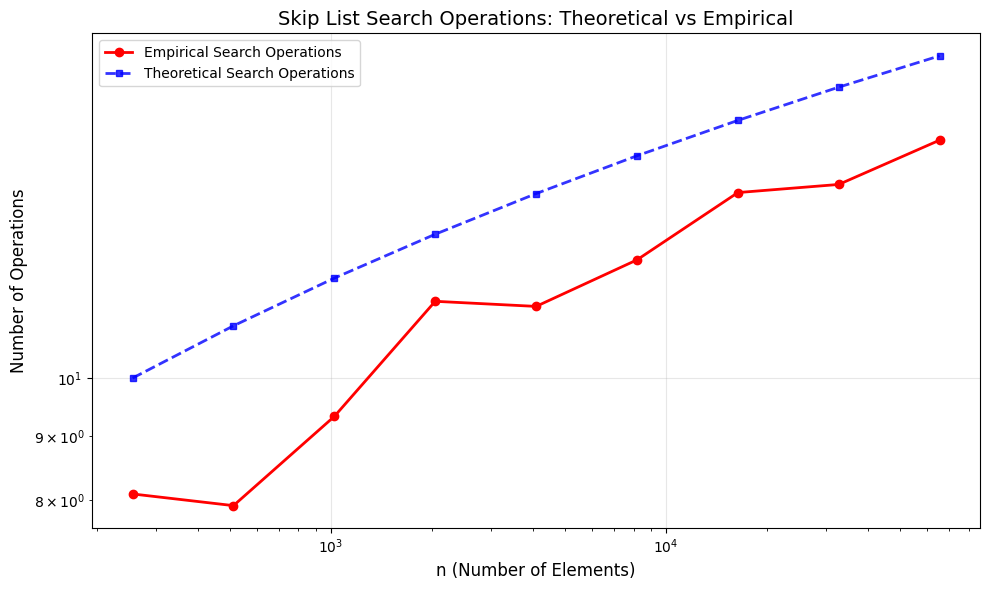


2. Generating Insert Operations Plot...


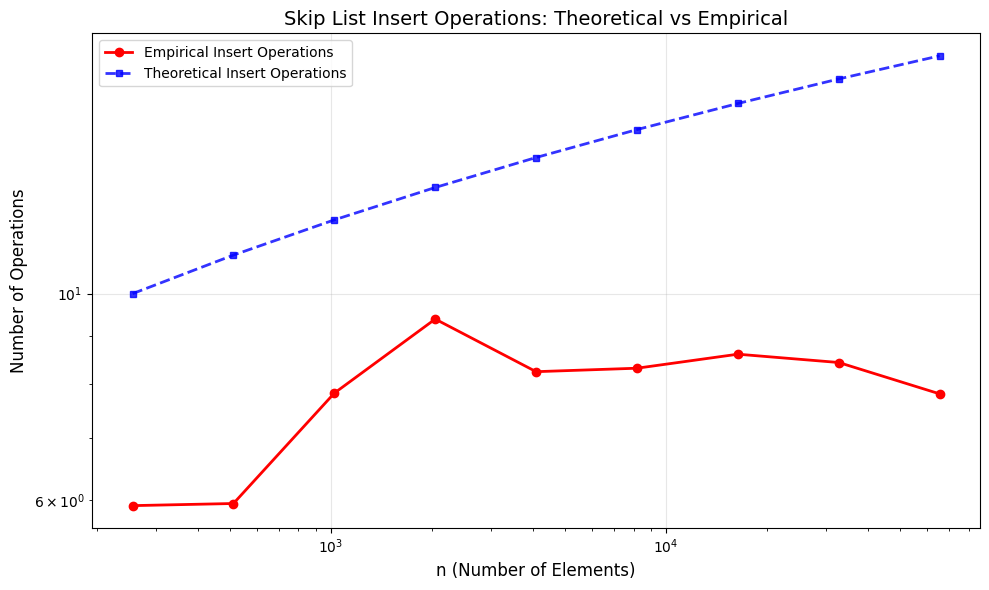


3. Generating Delete Operations Plot...


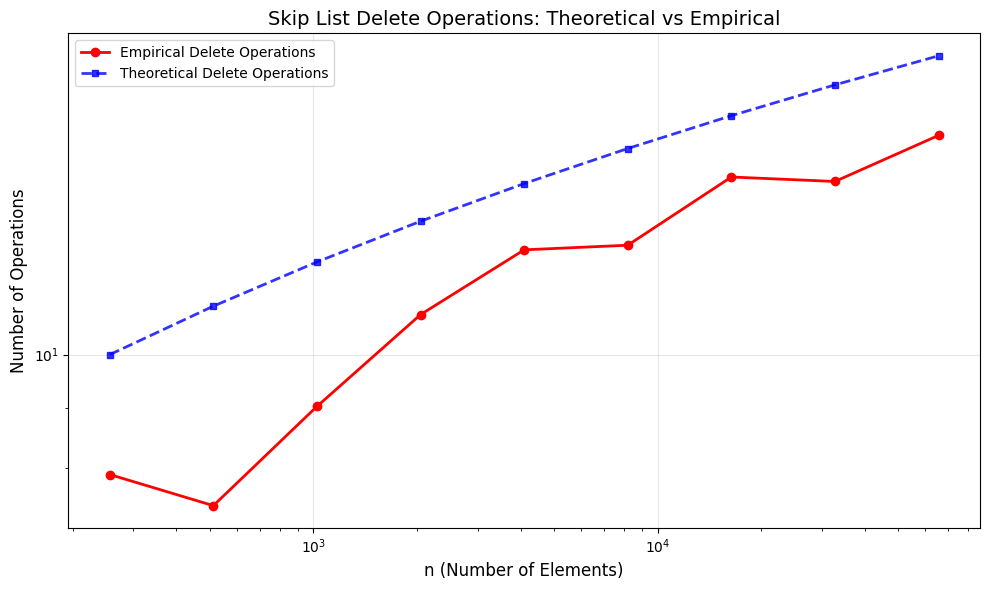


✅ All comparison plots generated successfully!


In [60]:
# Generate basic comparison plots for all operations
print("Generating analysis plots for all operations...")

# Search operations plot
print("\n1. Generating Search Operations Plot...")
experiment.plot_basic_comparison(search_results, 'search')

# Insert operations plot
print("\n2. Generating Insert Operations Plot...")
experiment.plot_basic_comparison(insert_results, 'insert')

# Delete operations plot
print("\n3. Generating Delete Operations Plot...")
experiment.plot_basic_comparison(delete_results, 'delete')

print("\n✅ All comparison plots generated successfully!")


4. Generating Combined Operations Comparison Plot...


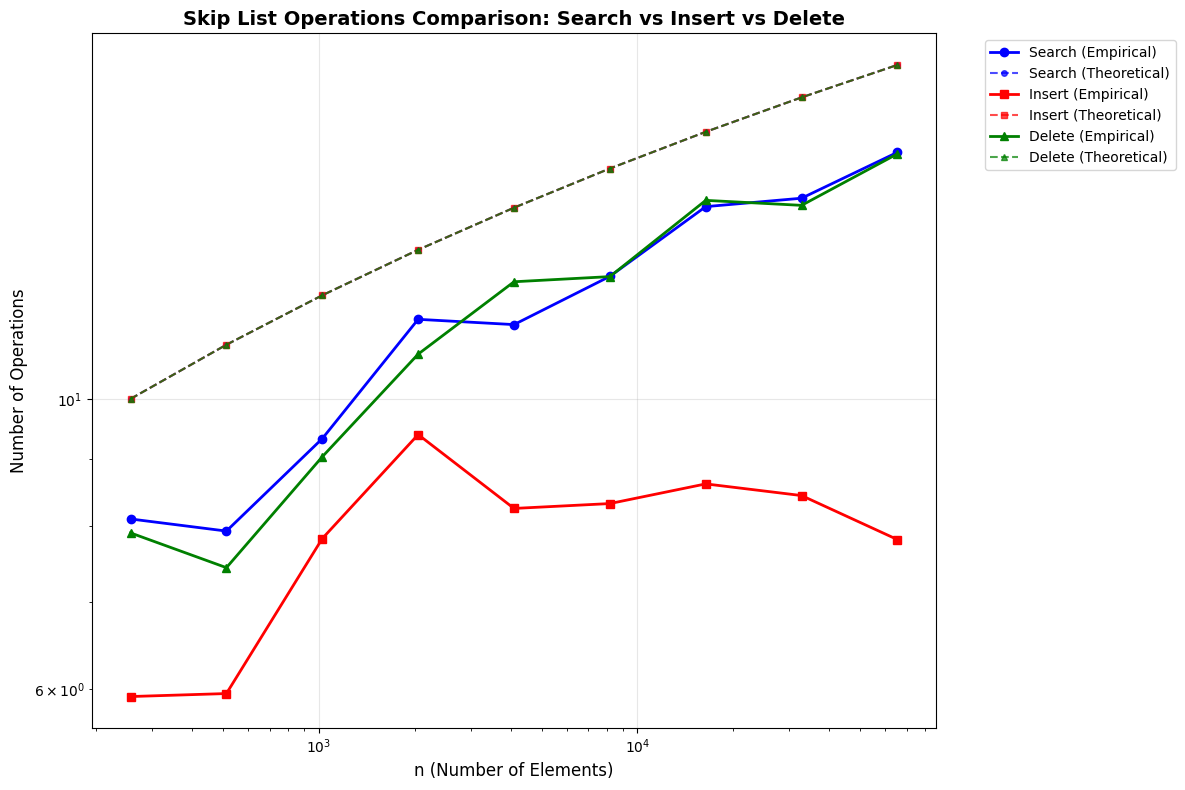

✅ Combined operations plot generated!


In [61]:
# Generate combined comparison plot for all operations
def plot_combined_operations(self, search_results, insert_results, delete_results):
    """Create a combined plot comparing all three operations"""
    plt.figure(figsize=(12, 8))
    
    # Extract data for each operation
    operations = [
        ('Search', search_results, 'blue', 'o'),
        ('Insert', insert_results, 'red', 's'),
        ('Delete', delete_results, 'green', '^')
    ]
    
    for op_name, results, color, marker in operations:
        if results:
            # Sort by n for better plotting
            sorted_results = sorted(results, key=lambda x: x['n'])
            
            n_values = [r['n'] for r in sorted_results]
            empirical_ops = [r['empirical_mean'] for r in sorted_results]
            theoretical_ops = [r['theoretical_expected'] for r in sorted_results]
            
            # Plot empirical results
            plt.plot(n_values, empirical_ops, color=color, marker=marker, 
                    label=f'{op_name} (Empirical)', linewidth=2, markersize=6)
            
            # Plot theoretical results with dashed lines
            plt.plot(n_values, theoretical_ops, color=color, linestyle='--', 
                    marker=marker, alpha=0.7, label=f'{op_name} (Theoretical)', 
                    linewidth=1.5, markersize=4)
    
    plt.xlabel('n (Number of Elements)', fontsize=12)
    plt.ylabel('Number of Operations', fontsize=12)
    plt.title('Skip List Operations Comparison: Search vs Insert vs Delete', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Use log scale for better visualization
    plt.xscale('log')
    plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

# Add method to SkipListExperiment class
SkipListExperiment.plot_combined_operations = plot_combined_operations

# Generate the combined plot
print("\n4. Generating Combined Operations Comparison Plot...")
experiment.plot_combined_operations(search_results, insert_results, delete_results)
print("✅ Combined operations plot generated!")

In [62]:
# Generate statistical comparison table
def display_operations_comparison_table(self, search_results, insert_results, delete_results):
    """Display a comparison table of all operations"""
    print(f"\n{'='*80}")
    print("OPERATIONS COMPARISON TABLE")
    print(f"{'='*80}")
    print(f"{'n':<8} {'Search (Emp)':<12} {'Insert (Emp)':<12} {'Delete (Emp)':<12} {'Theoretical':<12}")
    print("-" * 80)
    
    # Get common n values
    search_dict = {r['n']: r for r in search_results}
    insert_dict = {r['n']: r for r in insert_results}
    delete_dict = {r['n']: r for r in delete_results}
    
    common_n = sorted(set(search_dict.keys()) & set(insert_dict.keys()) & set(delete_dict.keys()))
    
    for n in common_n:
        search_emp = search_dict[n]['empirical_mean']
        insert_emp = insert_dict[n]['empirical_mean']
        delete_emp = delete_dict[n]['empirical_mean']
        theoretical = search_dict[n]['theoretical_expected']
        
        print(f"{n:<8} {search_emp:<12.2f} {insert_emp:<12.2f} {delete_emp:<12.2f} {theoretical:<12.2f}")
    
    print(f"{'='*80}")

# Add method to class and call it
SkipListExperiment.display_operations_comparison_table = display_operations_comparison_table

print("\n5. Generating Operations Comparison Table...")
experiment.display_operations_comparison_table(search_results, insert_results, delete_results)
print("✅ Comparison table generated!")


5. Generating Operations Comparison Table...

OPERATIONS COMPARISON TABLE
n        Search (Emp) Insert (Emp) Delete (Emp) Theoretical 
--------------------------------------------------------------------------------
256      8.09         5.92         7.90         10.00       
512      7.92         5.95         7.43         11.00       
1024     9.32         7.82         9.03         12.00       
2048     11.50        9.39         10.82        13.00       
4096     11.40        8.25         12.29        14.00       
8192     12.41        8.32         12.40        15.00       
16384    14.03        8.61         14.18        16.00       
32768    14.24        8.44         14.06        17.00       
65536    15.43        7.81         15.39        18.00       
✅ Comparison table generated!
